# 6. support vector machines
给定训练集样本 $D=\{(x_1,y_1),(x_2,y_2),...(x_m,y_m)\}, y\in\{-1,+1\}$,分类学习最基本的想法就是基于训练集D在样本空间中找到一个划分超平面，将不同类别的样本分开。由于数据点都在二维平面上，所以此时分割超平面就是一个平面。更高维的情况可以以此类推。如果数据集是三维的，那么此时用来分割数据的就是一个平面。超平面也就是分类的决策边界，分布在超平面一侧的所有数据都数以某个分类，另一侧的数据则属于另一个类别。

如果数据点离决策越远，那么其最后的预测结果也就越可信。我们希望找到离分割超平面最近的点，确保他们离分隔超平面的距离尽可能的大。这里点到分隔面的距离被称为间隔。

支持向量（support vector）就是离分隔超平面最近的那些点。

在样本空间中，分隔超平面可以用如下的线性方程来描述$w^Tx+b=0$，其中$w = (w_1;w_2....;w_d)$为法向量，决定了超平面的方向；b为位移项，决定了超平面与原点之间的距离。显然超平面可以被法向量w和位移b确定，将其记为$(w,b)$，样本空间中任一点x到超平面$(w,b)$的距离可写为$r = \frac{||w^TA+b||}{||w||}$。

假设超平面$(w,b)$能将训练样本正确分类，即对$(x_i,y_i)\in D$若$y_i=+1$，则有

$\begin{cases}
w^Tx_i+b\ge+1, y_i=+1\\
w^Tx_i+b\le-1,y_i=-1
\end{cases}
$

![svm.png](svm.png)

如图所示，距离超平面最近的这几个训练样本点使等号成立，他们被称为“支持向量”两个异类支持向量到超平面的距离之和为$r = \frac{2}{||w||}$，他被称为“间隔”。欲找到具有“最大间隔”(maximum margin)的划分超平面，也就是要找到能满足式中约束的参数$w$和$b$使得r最大，即

$
\max\limits_{w,1}\frac{2}{||w||} \\
s.t. \qquad y_i(w^Tx_i+b)\ge1, i = 1,2,...m
$

为了最大化间隔，仅需最大化$||w||^-1$，这个等价于最小化$||w||$于是可重写为：

$
\min\limits_{w,b} \frac{1}{2}||w||^2 \\
s.t. \qquad y_i(w^Tx_i+b)\ge1, i=1,2,...m    \tag{6.6}
$

这就是支持向量机的基本型。

我们希望求解式6.6来得到大间隔划分超平面所对应的模型：

$
f(x) = w^Tx + b
$

对式(6.6)使用拉格朗日乘子法可得到其“对偶问题”。对式(6.6)的每条约束添加拉格朗日乘子$\alpha_i \ge 0$，则该问题的拉格朗日函数可写为

$
L(w,b,\alpha) = \frac{1}{2}||w||^2 + \sum_{i=1}^{m}\alpha_i(1-y_i(w^Tx_i+b))
$

其中$\alpha=(\alpha_1;\alpha_2;...;\alpha_m)$。令L(w,b,a)对w和b的偏导为零可得：

$
w = \sum_{i=1}^{m} \alpha_i y_i x_i,  \tag{6.9}
$
$0 = \sum_{i=1}^{m} \alpha_i y_i,     \tag{6.10}$

将式(6.9)代入(6.8)，即可将$L(w,b,\alpha)$中的$w和b$消去，在考虑式(6.10)的约束，就得到式(6.6)的对偶问题

$
\max \limits_{\alpha} \sum_{i=1}^{m}\alpha_i-\frac{1}{2}\sum_{i=1}^{m}\sum_{j=1}^{m}\alpha_i\alpha_jy_iy_jx_i^Tx_j \\
s.t. \quad \sum_{i=1}^{m}\alpha_iy_i=0, \\
\alpha_i \ge0, \quad i=1,2,...,m
$

解出$\alpha$后，求出$w$与$b$即可得到模型

$
f(x)=w^Tx+b \\
\quad = \sum_{i=1}^{m}\alpha_iy_ix_i^Tx+b
$

简化版的SMO算法：

platt SMO算法中的外驯化确定要优化的最佳alpha对。而简化版的却会跳过这一部分，首先在数据集上遍历每一个alpha，然后在剩下的alpha集合中随机选择另一个alpha，从而构架alpha对。这里有一点相当重要，就是要同时改变两个alpha。之所以这样做是因为有一个约束条件：$\sum a_i \cdot label^{(i)}=0$由于改变一个alpha可能会导致该约束条件失效，因此总是同时改变这两个alpha。

In [20]:
import random

'''从某个范围内随机选择一个整数
    i : alpha的下标
    m : 所有alpha的数目

'''
def selectJrand(i,m):
    j=i
    while (j==i):
        j = int(random.uniform(0,m))
    return j


# 在数值过大时对其进行调整，确保aj在high和low之间
def clipAlpha(aj, H, L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj

SMO函数的伪代码大致如下：
```
创建一个alpha向量并将其初始化为0向量
当迭代次数小于最大迭代次数时（外循环）
    对数据集中的每个数据向量（内循环）：
        如果该数据向量可以被优化：
            随机选择另一个数据向量
            同时优化这两个向量
            如果两个向量都不能被优化，退出内循环
    如果所有向量都没被优化，增加迭代数目，继续下一次循环
```

In [21]:
import pandas as pd
import numpy  as np




SMO算法的基本思路是先固定住$\alpha_i$之外的所有参数，然后求$\alpha_i$上的极值。由于存在约束$\sum_{i=1}^{m}\alpha_iy_i=0$若固定住$\alpha_i$之外的其他变量，则$\alpha_i$可由其他变量导出。于是，SMO每次选择两个变量$\alpha_i$和$\alpha_j$，并固定其他参数。这样，在参数初始化后，SMO通过不断执行如下两个步骤直至收敛：
- 选取一对需要更新的变量$\alpha_i$和$\alpha_j$
- 固定$\alpha_i$和$\alpha_j$以外的参数，求解式（6.11）获得更新后的$\alpha_i$和$\alpha_j$

## 6.1. 简单SMO算法

In [36]:
'''
    参数： dataMatIn: 数据集
          classLabels: 标签
          C :常数C
          toler: 容错率
          maxIter： 最大循环次数
    
    返回值： b,alpha 
'''

def smoSimple(dataMatIn, classLabels, C: int, toler: float, maxIter: int):
    dataMatrix = np.mat(dataMatIn)
    labelMatrix = np.mat(classLabels).transpose()
    # w^Tx+b确定一个超平面
    b = 0
    m,n = dataMatrix.shape
    alphas = np.mat(np.zeros((m,1)))
    iternum = 0
    
    while(iternum < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            # multiply数组和矩阵对应位置相乘，输出与相乘数组/矩阵的大小一致
            # alphas m*1 转置之后 1*m
            # dataMatrix[i,:] 是取第i行 1*n 转置之后是 n*1,dataMatrix是m*n 两者相乘是m*1
            # fXi 是由1×m和m*1两个向量相乘而来，是一个常数
            fXi = float(np.multiply(alphas, labelMatrix).T*(dataMatrix*dataMatrix[i,:].T))+b
            Ei = fXi - float(labelMatrix[i])
            if ((labelMatrix[i]*Ei < -toler) and (alphas[i] < C)) or \
            ((labelMatrix[i]*Ei > toler) and (alphas[i]>0)):
                j = selectJrand(i,m)
                fXj = float(np.multiply(alphas,labelMatrix).T*(dataMatrix*dataMatrix[j,:].T))+b
                Ej = fXj - float(labelMatrix[j])
                alphaIold = alphas[i].copy()
                alphaJold = alphas[j].copy()
                if (labelMatrix[i]!=labelMatrix[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print("L==H");continue
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - \
                    dataMatrix[i,:]*dataMatrix[i,:].T - \
                    dataMatrix[j,:]*dataMatrix[j,:].T
                if eta>=0: print("eta>=0");continue
                alphas[j] -= labelMatrix[j]*(Ei - Ej)/eta
                alphas[j] = clipAlpha(alphas[j], H, L)
                if (abs(alphas[j] - alphaJold) < 0.00001):
                    print("j not moving enough")
                    continue
                alphas[i] += labelMatrix[j]*labelMatrix[i]*(alphaJold - alphas[j])
                b1 = b - Ei - labelMatrix[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - \
                    labelMatrix[j] * (alphas[j] - alphaJold) * dataMatrix[i,:] * dataMatrix[j,:].T
                b2 = b - Ej - labelMatrix[i] * (alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - \
                    labelMatrix[j]*(alphas[j]-alphaJold) * dataMatrix[j,:]*dataMatrix[j,:].T
                if (0<alphas[i]) and (C > alphas[i]):
                    b = b1
                elif (0 < alphas[j]) and (C > alphas[j]):
                    b = b2
                else:
                    b = (b1+b2)/2.0
                alphaPairsChanged += 1
                print("iter: %d i: %d, pairs cahnged %d" % (iternum, i, alphaPairsChanged))
                
        if  alphaPairsChanged==0:
            iternum += 1
        else:
            iternum = 0
        print("iteration number: %d " %iternum)
    return b,alphas

In [37]:
df = pd.read_csv("testSet.txt", sep='\t')
dataArr = df.iloc[:,0:2]
labels = df.labels
b,alpha = smoSimple(dataArr, labels, 0.6, 0.0001, 40)

iter: 0 i: 0, pairs cahnged 1
j not moving enough
j not moving enough
iter: 0 i: 5, pairs cahnged 2
L==H
j not moving enough
iter: 0 i: 10, pairs cahnged 3
j not moving enough
L==H
j not moving enough
L==H
j not moving enough
j not moving enough
L==H
j not moving enough
iter: 0 i: 54, pairs cahnged 4
j not moving enough
j not moving enough
L==H
j not moving enough
j not moving enough
iteration number: 0 
j not moving enough
iter: 0 i: 1, pairs cahnged 1
j not moving enough
j not moving enough
iter: 0 i: 10, pairs cahnged 2
L==H
j not moving enough
j not moving enough
L==H
j not moving enough
j not moving enough
L==H
j not moving enough
iter: 0 i: 69, pairs cahnged 3
j not moving enough
iteration number: 0 
j not moving enough
iter: 0 i: 1, pairs cahnged 1
j not moving enough
L==H
L==H
j not moving enough
iter: 0 i: 29, pairs cahnged 2
j not moving enough
j not moving enough
j not moving enough
L==H
j not moving enough
iter: 0 i: 82, pairs cahnged 3
iteration number: 0 
iter: 0 i: 0, pa

j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 3 
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 3 i: 52, pairs cahnged 1
j not moving enough
j not moving enough
iter: 3 i: 69, pairs cahnged 2
iteration number: 0 
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iter: 0 i: 55, pairs cahnged 1
j not moving enough
j not moving enough
iteration number: 0 
j not moving enough
iter: 0 i: 29, pairs cahnged 1
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 0 
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1 
j not moving enough
j not moving enough
j not moving enough
j not 

j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 2 
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 3 
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 4 
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 5 
iter: 5 i: 17, pairs cahnged 1
j not moving enough
iter: 5 i: 52, pairs cahnged 2
j not moving enough
j not moving enough
iteration number: 0 
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1 
j not moving enough
j not moving enough
iter: 1 i: 29, pairs cahnged 1
j not moving enough
j not moving enough
j not moving enough
iteration number: 0 
j not moving enough
j not moving enough
j not moving enough
j not moving enough


iteration number: 16 
j not moving enough
j not moving enough
j not moving enough
iteration number: 17 
j not moving enough
j not moving enough
j not moving enough
iteration number: 18 
j not moving enough
j not moving enough
iteration number: 19 
j not moving enough
j not moving enough
iteration number: 20 
j not moving enough
j not moving enough
iteration number: 21 
j not moving enough
j not moving enough
iteration number: 22 
j not moving enough
j not moving enough
iteration number: 23 
j not moving enough
j not moving enough
iteration number: 24 
j not moving enough
j not moving enough
iteration number: 25 
j not moving enough
j not moving enough
iteration number: 26 
j not moving enough
j not moving enough
iteration number: 27 
iter: 27 i: 29, pairs cahnged 1
j not moving enough
j not moving enough
iteration number: 0 
j not moving enough
j not moving enough
iteration number: 1 
j not moving enough
j not moving enough
iteration number: 2 
j not moving enough
j not moving enough
i

In [38]:
b

matrix([[-3.82752323]])

In [39]:
alpha[alpha>0]

matrix([[0.17344077, 0.08465196, 0.10752104, 0.36561376]])

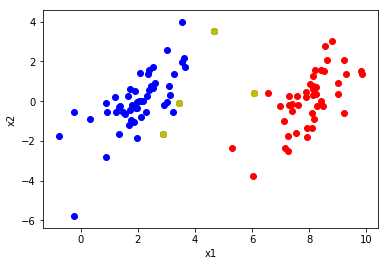

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
pos = df[df['labels']==1]
neg = df[df['labels']==-1]
plt.scatter(pos['x1'], pos['x2'], c='r')
plt.scatter(neg['x1'], neg['x2'], c='b')
plt.xlabel("x1")
plt.ylabel('x2')
# 输出支持向量
for i in range(100):
    if alpha[i]>0.0:
        dataArr = np.array(dataArr)
        plt.scatter(dataArr[i][0], dataArr[i][1], c='y')

plt.show()

## 6.2. 完整platt SMO算法

完整的SMO算法在alpha的选择上应用了一些能够提速的启发式方法。

Platt SMO算法是通过一个外循环来选择第一个alpha值的，并且选择过程中会在两种方式之间进行交替：一种方式是在所有数据集上进行单遍扫描，另一种方式则是在非边界alpha中实现单遍扫描。非边界指在不等于边界0或c的aplha值。

在选择第一个alpha值后，算法会通过一个内循环来选择第二个alpha值。在优化过程中，会通过最大步长的方式来获得第二个alpha值。在简化版的算法中，会在选择j之后计算错误率Ej。这里，会建立一个全局的缓存用于保存误差值，并从中选择使得步长或者说Ei-Ej最大的值。

In [65]:
# 建立数据结构方便保存重要的值
class optStruct:
    def __init__(self, dataMathIn, classLabels, C, toler):
        self.X = dataMathIn
        self.labelMat = classLabels
        self.C = C
        self.tol = toler
        self.m = dataMathIn.shape[0]
        self.alphas = np.mat(np.zeros((self.m,1)))
        self.b = 0
        self.eCache = np.mat(np.zeros((self.m,2)))
        
# 对于一个给定的alpha值，计算误差并返回误差
# 预测标签与实际标签的误差
def calcEk(oS: optStruct, k):
    fXk = float(np.multiply(oS.alphas, oS.labelMat).T*(oS.X*oS.X[k,:].T)) + oS.b
    Ek = fXk - float(oS.labelMat[k])
    return Ek


# 用于选择第二个alpha值。该函数的误差值与第一个alpha值Ei和下标i有关
def selectJ(i, oS: optStruct, Ei):
    maxK = -1; maxDeltaE = 0; Ej=0
    oS.eCache[i] = [1, Ei]
    # 返回非零的E值对应的alpha值
    validEcacheList = np.nonzero(oS.eCache[:,0].A)[0]
    
    # 选择改变最大的值
    if len(validEcacheList) > 1:
        for k in validEcacheList:
            if k == i:
                continue
            Ek = calcEk(oS, k)
            deltaE = abs(Ei - Ek)
            if (deltaE > maxDeltaE):
                maxK = k
                maxDeltaE = deltaE
                Ej = Ek
            return maxK, Ej
    # 如果是第一次循环，那么随机选择一个aplha值
    else:
        j = selectJrand(i, oS.m)
        Ej = calcEk(oS, j)
        return j, Ej
    
def updateEk(oS: optStruct, k):
    Ek = calcEk(oS, k)
    oS.eCache[k] = [1, Ek]

In [66]:
def innerL(i, oS: optStruct):
    Ei = calcEk(oS, i)
    if ((oS.labelMat[i]*Ei < oS.tol) and (oS.alphas[i] < oS.C)) or \
       ((oS.labelMat[i]*Ei > oS.tol) and (oS.alphas[i] > 0)):
        j, Ej = selectJ(i, oS, Ei)
        alphaIold = oS.alphas[i].copy()
        alphaJold = oS.alphas[j].copy()
        if (oS.labelMat[i] != oS.labelMat[j]):
            L = max(0, oS.alphas[j] - oS.alphas[i])
            H = min(oS.C, oS.C + oS.alphas[j] - oS.alphas[i])
        else:
            L = max(0, oS.alphas[j] + oS.alphas[i] - oS.C)
            H = min(oS.C, oS.alphas[j] + oS.alphas[i])
            
        if L == H:
            print("L==H")
            return 0
        eta = 2.0 * oS.X[i,:] * oS.X[j,:].T - oS.X[i, :]*oS.X[i,:].T - oS.X[j,:]*oS.X[j,:].T
        if eta >= 0: 
            print("eta>=0")
            return 0
        oS.alphas[j] -= oS.labelMat[j]*(Ei - Ej)/eta
        oS.alphas[j] = clipAlpha(oS.alphas[j], H, L)
        updateEk(oS, j)
        b1 = oS.b - Ei - oS.labelMat[i]*(oS.alphas[i] - alphaIold) * \
             oS.X[i,:]*oS.X[i,:].T - oS.labelMat[j]* \
             (oS.alphas[j] - alphaJold)*oS.X[i,:]*oS.X[j,:].T
        b2 = oS.b - Ei - oS.labelMat[i]*(oS.alphas[i] - alphaIold) * \
             oS.X[i,:]*oS.X[j,:].T - oS.labelMat[j]* \
             (oS.alphas[j] - alphaJold)*oS.X[j,:]*oS.X[j,:].T
        
        if (0 < oS.alphas[i]) and (oS.C > oS.alphas[i]):
            oS.b = b1
        elif (0 < oS.alphas[j]) and (oS.C > oS.alphas[j]):
            oS.b = b2
        else:
            oS.b = (b1 + b2)/2.0
        return 1
    else:
        return 0
    

In [73]:
def smoP(dataMatIn, classLabels, C, toler, maxIter, kTup=('lin', 0)):
    oS = optStruct(np.mat(dataMatIn),np.mat(classLabels).transpose(), C, toler)
    iterNum = 0
    entireSet = True
    alphaPairsCahnged = 0
    
    while (iterNum < maxIter) and (alphaPairsCahnged > 0 or entireSet): 
        alphaPairsCahnged = 0
        if entireSet:
            for i in range(oS.m):
                alphaPairsCahnged += innerL(i, oS)
                print("fullSet, iter %d, i: %d, pairs cahnged %d" %(iterNum, i, alphaPairsCahnged))
            iterNum += 1
        else:
            nonBoundIs = np.nonzero((oS.alphas.A > 0) * (oS.alphas.A < C))[0]
            for i in nonBoundIs:
                alphaPairsCahnged += innerL(i, oS)
                print("non-bound,iter: %d, i: %d, pairs cahnged %d" %(iterNum, i, alphaPairsCahnged))
            iterNum += 1
            
        if entireSet:
            entireSet = False
        elif (alphaPairsCahnged == 0):
            entireSet = True
        print("iteration number: %d" % iterNum)
    return oS.b, oS.alphas

In [81]:
b, alphas = smoP(dataArr, labels, 0.6, 0.001, 40)

fullSet, iter 0, i: 0, pairs cahnged 1
fullSet, iter 0, i: 1, pairs cahnged 1
fullSet, iter 0, i: 2, pairs cahnged 2
fullSet, iter 0, i: 3, pairs cahnged 2
fullSet, iter 0, i: 4, pairs cahnged 2
fullSet, iter 0, i: 5, pairs cahnged 3
fullSet, iter 0, i: 6, pairs cahnged 3
fullSet, iter 0, i: 7, pairs cahnged 3
fullSet, iter 0, i: 8, pairs cahnged 3
fullSet, iter 0, i: 9, pairs cahnged 3
fullSet, iter 0, i: 10, pairs cahnged 3
fullSet, iter 0, i: 11, pairs cahnged 3
fullSet, iter 0, i: 12, pairs cahnged 3
fullSet, iter 0, i: 13, pairs cahnged 3
fullSet, iter 0, i: 14, pairs cahnged 3
fullSet, iter 0, i: 15, pairs cahnged 3
fullSet, iter 0, i: 16, pairs cahnged 3
L==H
fullSet, iter 0, i: 17, pairs cahnged 3
fullSet, iter 0, i: 18, pairs cahnged 3
fullSet, iter 0, i: 19, pairs cahnged 3
fullSet, iter 0, i: 20, pairs cahnged 3
fullSet, iter 0, i: 21, pairs cahnged 3
fullSet, iter 0, i: 22, pairs cahnged 3
fullSet, iter 0, i: 23, pairs cahnged 3
fullSet, iter 0, i: 24, pairs cahnged 3
fullS

In [82]:
b

matrix([[-4.42144949]])

In [84]:
#计算w

def calcWs(alphas, dataArr, classLabels): 
    X = np.mat(dataArr)
    labelMat = np.mat(classLabels).transpose()
    m,n = X.shape
    w = np.zeros((n,1))
    for i in range(m):
        w += np.multiply(alphas[i]*labelMat[i], X[i,:].T)
    return w

In [87]:
w = calcWs(alphas, dataArr, labels)

In [102]:
y = np.mat(dataArr[0])*np.mat(w)+b
dataArr[0]

array([3.542485, 1.977398])

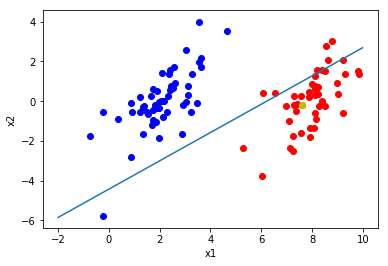

In [113]:
#画图

pos = df[df['labels']==1]
neg = df[df['labels']==-1]
plt.scatter(pos['x1'], pos['x2'], c='r')
plt.scatter(neg['x1'], neg['x2'], c='b')
plt.xlabel("x1")
plt.ylabel('x2')
# 输出支持向量
for i in range(100):
    if alphas[i]>0.0:
        dataArr = np.array(dataArr)
        plt.scatter(dataArr[i][0], dataArr[i][1], c='y')
        
x = np.arange(-2,10,0.01)
y = np.multiply(np.mat(x).T,np.mat(w[0]).T) + b
plt.plot(x,y)

plt.show()

现实任务中，原始样本空间内也许并不存在一个能正确划分两类样本的超平面。例如异或问题就不是线性可分的，或者两类数据点分别分布在一个圆形的内部和外部。对这样的问题，可将样本从原始空间映射到一个更高维的特征空间，使得样本在这个特征空间内线性可分。若将原始的二维空间映射到一个合适的da